In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Numerics with single population dynamics in continuous time

### Erol Akcay
Department of Biology, University of Pennsylvania

Bio 417 Spring 2021

In this notebook, we will do some basic numerical analysis of population dynamics of a single population, where there is only one population size to keep track of, hence a one-dimensional system. 

First, we can start with the exponential. We usually don't have solve something as simple as the exponential on the computer, but we will numerically integrate the exponential growth to illustrate how it is done in the scipy package of Python. First, we need to import the integrate package from scipy:

In [2]:
from scipy import integrate 

Then we define the right-hand side (i.e., what dn/dt is equal to) as a function:

In [3]:
def exponentialgr(n, t, r):
    return r * n 

Next comes the integration step: we make a vector of time points (time_vec), and then call up integrate.odeint, which is the function that does the numerical integration. The first argument is the function, the next one the initial condition (i.e., what n is at the first value in the time_vec), the third the vector of time values, and the last one is any other parameters we want to pass on to the function being integrated (input as a tuple). In our case, we would like to pass on the intrinsic growth rate, r.

In [4]:
time_vec = np.linspace(0,4,40)
n_vec = integrate.odeint(exponentialgr, 1, time_vec, args=(1.1,))

And we can plot the resulting set of values.

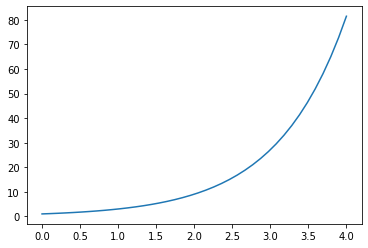

In [5]:
plt.plot(time_vec, n_vec)

Now, we can play around with the step size: as the plot below shows, the integrator will compute the value of the function only at the specified time points, so we if want to approximate the trajectory in continous time, we need to use a dense enough time-vector

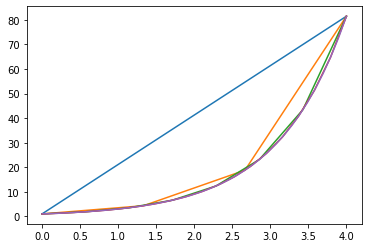

In [6]:
for i in [2,4,8,20,40]:
    time_vec_i = np.linspace(0,4,i)
    n_vec_i = integrate.odeint(exponentialgr, 1, time_vec_i, args=(1.1,))
    plt.plot(time_vec_i, n_vec_i)

Now, integrating the logistic growth equation

In [8]:
def logisticgr(n, t, r, k):
    return r * n * (1 - n / k) 

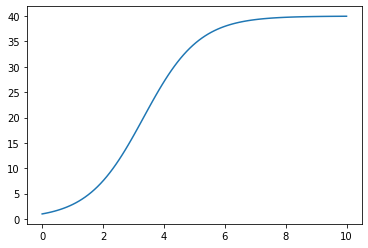

In [9]:
time_vec = np.linspace(0,10,100)
n_vec = integrate.odeint(logisticgr, 1, time_vec, args=(1.1, 40))
plt.plot(time_vec,n_vec)

Try different initial conditions

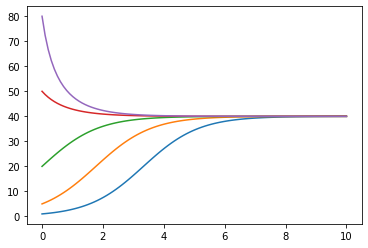

In [10]:
time_vec = np.linspace(0,10,100)
for i in [1,5,20,50,80]:
    n_vec_i = integrate.odeint(logisticgr, i, time_vec, args=(1.1, 40))
    plt.plot(time_vec,n_vec_i)

This confirms visually that the carrying capacity of the logistic equation is globally stable. Let's plot some flow diagrams, i.e., the plot of $\frac{dN}{dt}$ against $N$, instead of $t$ (as above). The code below does that, and plots the arrows and the location of equilibria using matplotlib (open circle for an unstable equilibrium, and closed for a stable)

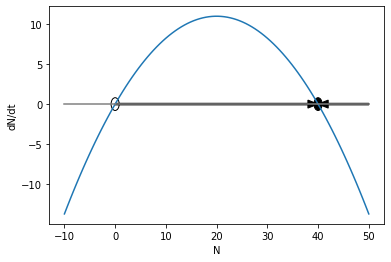

In [11]:
n_vec=np.linspace(-10,50,100)
dndt_vec = logisticgr(n_vec, 0, 1.1, 40)
plt.plot(n_vec, dndt_vec)
plt.plot(n_vec, np.zeros(100),c="gray")
plt.ylabel("dN/dt")
plt.xlabel("N")
plt.arrow(0, 0, 38.0, 0, fc="k", width=.2, ec="k", head_width=1, head_length=2 )
plt.arrow(50, 0, -8.0, 0, fc="k", width=.2, ec="k",head_width=1, head_length=2 )
eq1=plt.Circle((40,0), .8, color='black', fill=True)
eq0=plt.Circle((0,0), .8, color='black', fill=False)
plt.gca().add_patch(eq1)
plt.gca().add_patch(eq0)